### - OBJETIVO

Previsão da demanda para os próximos 5 dias

### - Dataset

Este conjunto de dados foi fornecido pelaempresa para a realização do desafio e foi remetido através do email pessoal

Os conjunto de dados está disponível em um repositório no GitHub que pode ser acessado através do link:

### - Preparando o ambiente

In [3]:
# Importando biblioteca necessária
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

### - Carregando o conjunto de dados

In [4]:
data = pd.read_excel('Dados.xlsx')

### - Estrutura dos dados

In [5]:
data.head()

,Data,Vendas
0,2022-12-06,870
1,2022-12-07,868
2,2022-12-08,1189
3,2022-12-09,742
4,2022-12-10,317


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    46 non-null     datetime64[ns]
 1   Vendas  46 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 864.0 bytes


In [7]:
# Informações Estatísticas da base de dados
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Vendas,46.0,755.434783,430.762201,18.0,346.5,810.5,1053.75,1692.0


### - Transformando o conjunto de dados

In [8]:
data.set_index('Data', inplace=True)

### - Visualizando os Dados de Vendas

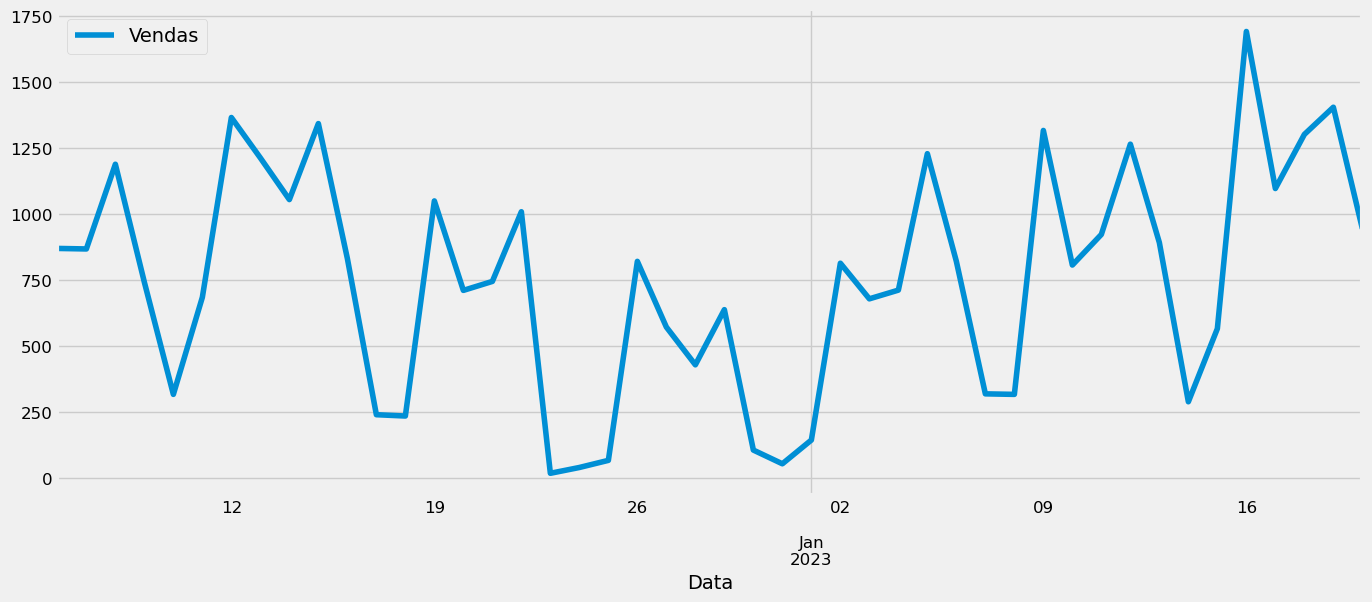

In [9]:
data.plot(figsize=(15, 6))
plt.show()

Conforme o gráfico podemos verificar uma sazonalidade nas vendas, assim importante também visualizar os dados usando o método 
de decomposição de série temporal que nos permite verificar a tendência, sazonalidade e ruído.

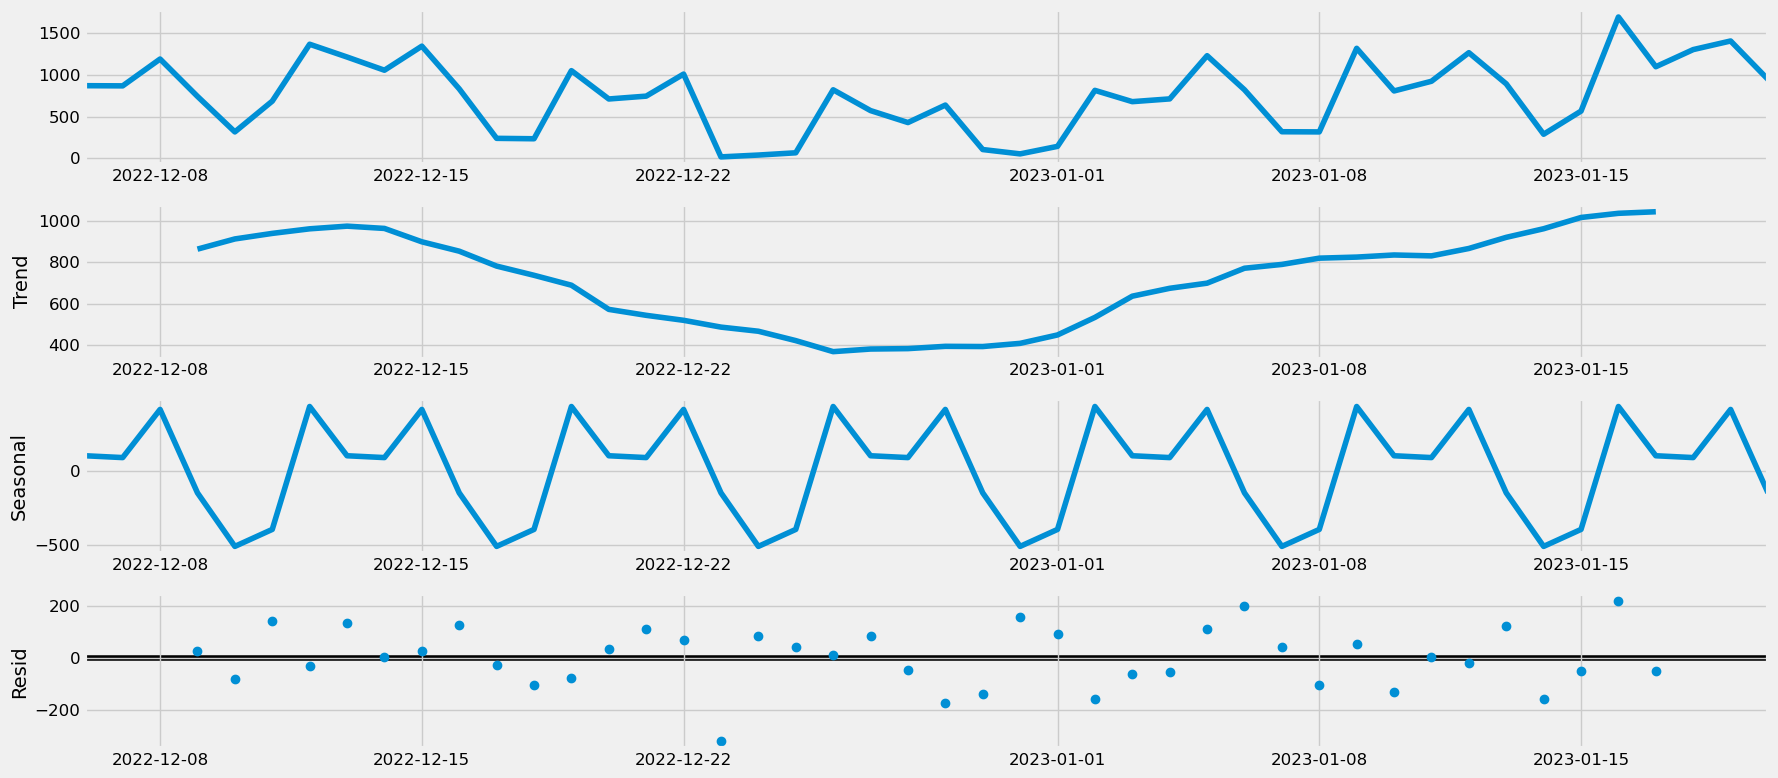

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(data, model='additive')
fig = decomposition.plot()
plt.show()

A partir destes gráficos verificamos claramente que há uma instabilidade nas vendas com uma certa sazonalidade.

### - Previsão de Vendas com o ARIMA

In [11]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [12]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:738.5825502651812
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1381.2270347346207
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:527.741851803102
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:330.22907572664116
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:540.9482575238443
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1187.9734770220737
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:350.11685828820987
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:331.73343832116996
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:687.6087119465293
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2506.3736483158054
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:503.03719632694856
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:311.1653989662357
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:528.9851819513605
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2589.0159352228993
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:346.195367323698
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:312.86493782674796
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:668.0249193010808
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1327.8206352621426
AR

A saida sugere o SARIMAX (0, 1, 1)x(0, 1, 1, 12) - AIC:300.5597021041236, com menor valor de AIC.

### - Ajustando o modelo ARIMA

In [13]:
mod = sm.tsa.statespace.SARIMAX(data,
                                order=(0, 1, 1),
                                seasonal_order=(0,1, 1, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7475      0.165     -4.523      0.000      -1.071      -0.424
ma.S.L12      -1.0000      0.335     -2.982      0.003      -1.657      -0.343
sigma2      2.164e+05   1.55e-06    1.4e+11      0.000    2.16e+05    2.16e+05


Plotando o diagnósticos de modelo para investigar qualquer comportamento incomum.

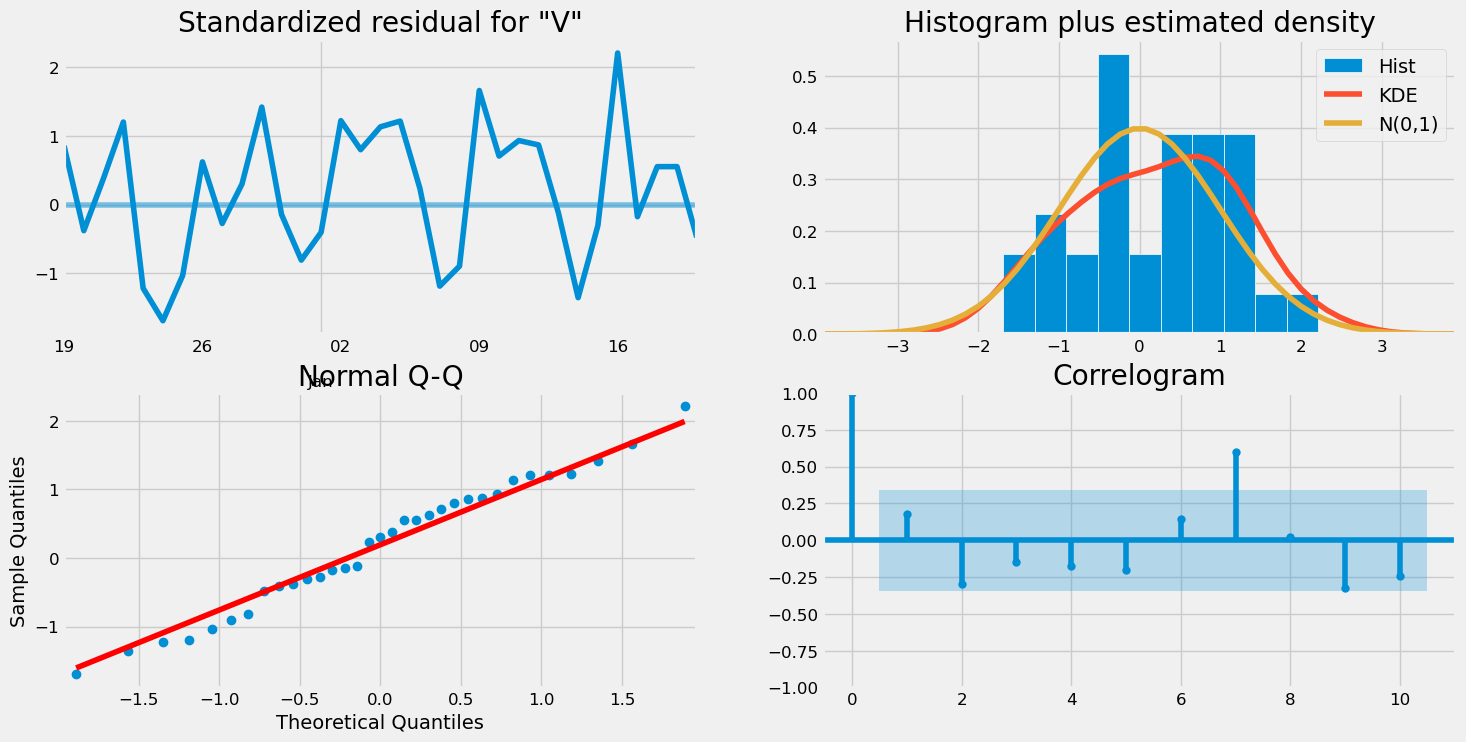

In [14]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

Através do diagnóstico podemos visualizar algumas imperfeições, no entando o nosso modelo sugere que os resíduos estão próximos
da distribuição normal.

### - Validando as Previsões

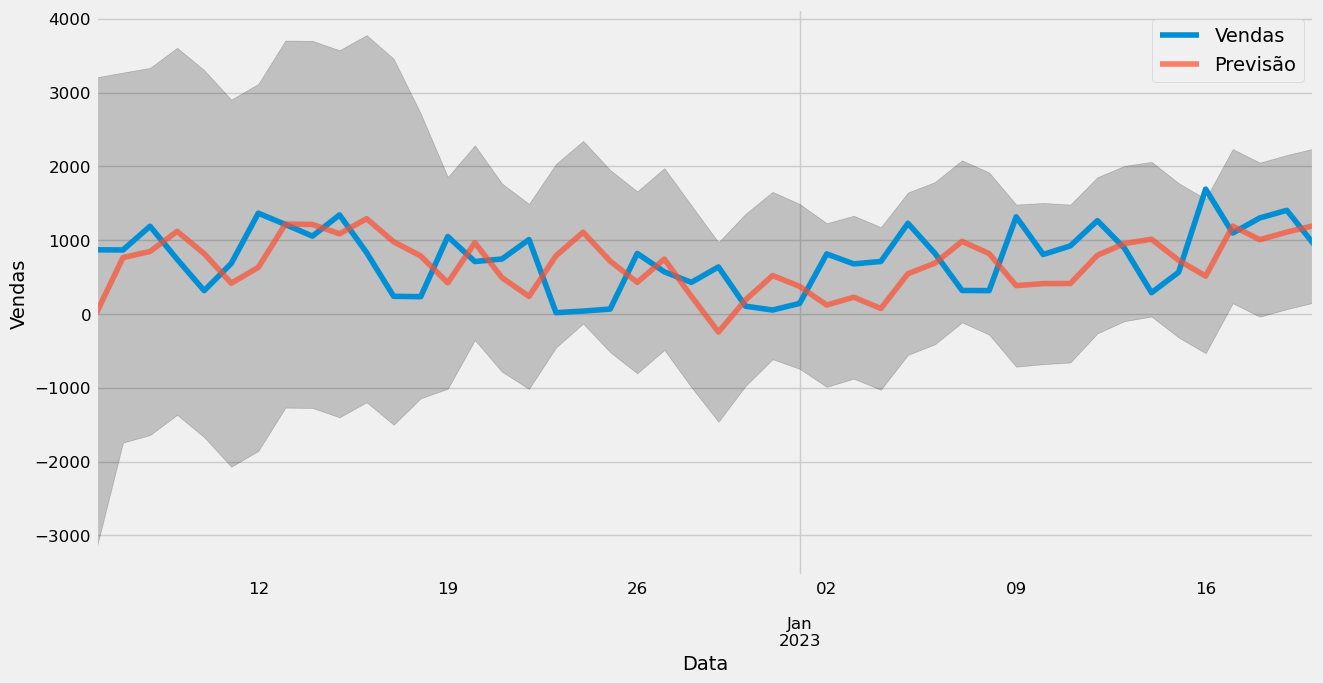

In [15]:
pred = results.get_prediction(start=('2022-12-06'), dynamic=False)
pred_ci = pred.conf_int()
ax = data['2022-12-06':].plot(label='Observado')
pred.predicted_mean.plot(ax=ax, label='Previsão', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Data')
ax.set_ylabel('Vendas')
plt.legend()
plt.show()

Neste gráfico temos a comparação entre as vendas reais e às vendas previstas, apesar de algumas imperfeições no modelo, as 
projeções no geral se aproximam muito bem dos valores reais mostrando uma tendência média e com uma certa sazonalidade.

In [16]:
data_forecasted = pred.predicted_mean
data_truth = data['Vendas']
mse = ((data_forecasted - data_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 294719.68


In [17]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 542.88


Root Mean Square Error (RMSE) nos diz que o nosso modelo foi capaz de prever a média diária de vendas no conjunto 
de teste dentro de 542.88 das vendas reais.

### - Visualizando as Previsões

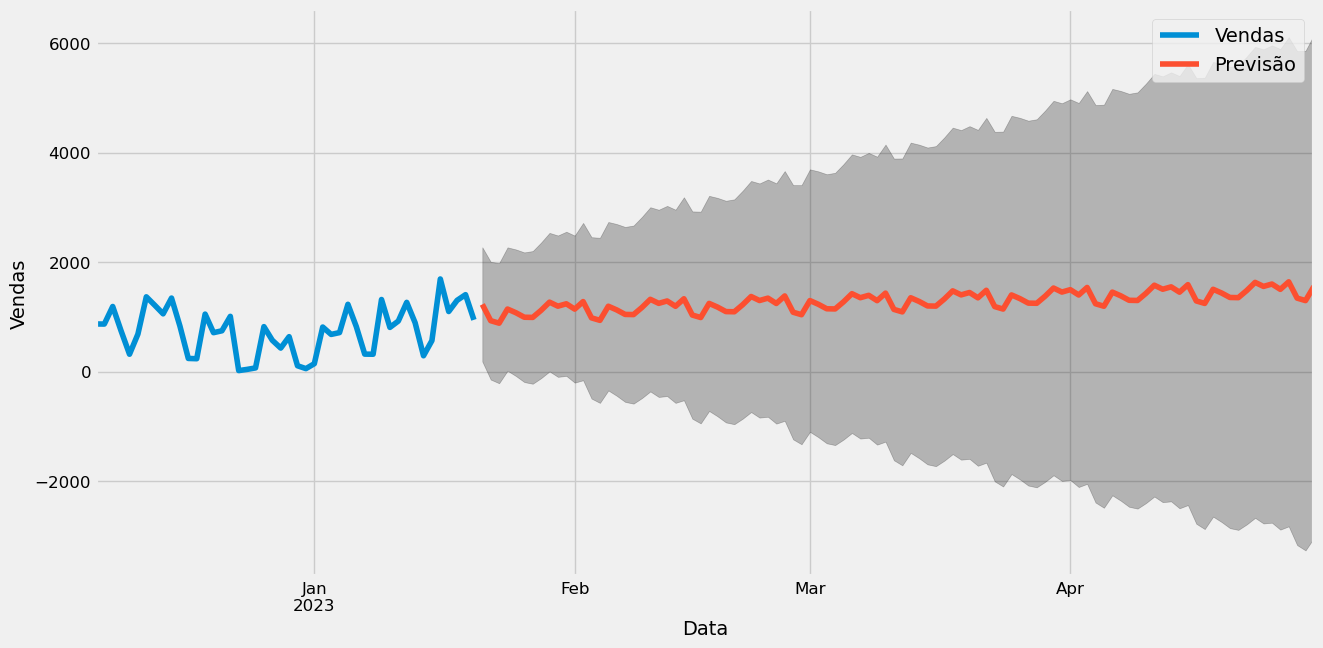

In [18]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = data.plot(label='Observado', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Previsão')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Data')
ax.set_ylabel('Vendas')
plt.legend()
plt.show()

O modelo captou razoavelmente a sazonalidade de vendas projetando para uma média de vendas diárias próxima das vendas reais.